In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from tqdm import tqdm

from models import *

In [2]:
device = torch.device('cpu')

### Models

In [3]:
fine = FineRBM(1)
coarse = CoarseRBM()

In [4]:
Loss = lambda v, v_hat : -torch.mean(v * torch.log(v_hat) + (1 - v) * torch.log(1 - v_hat))

### Train

In [5]:
optimizer = torch.optim.Adam(coarse.parameters(), lr=0.001)

losses = []
J_As = []
J_Es = []

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8192/8192 [00:10<00:00, 807.06it/s]


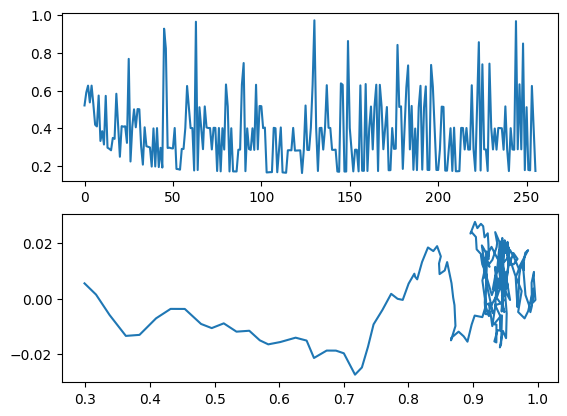

In [6]:
iters = 8192

for i in tqdm(range(iters)):
    optimizer.zero_grad()

    x = fine.joint(n=4)
    x_hat = coarse(x.bernoulli())

    loss = Loss(x, x_hat)
    loss.backward()
    optimizer.step()

    if i % 32 == 0:
        losses.append(float(loss))
        J_As.append(float(coarse.J_A))
        J_Es.append(float(coarse.J_E))
        
fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(losses)
ax1.plot(J_As, J_Es)
ax1.plot(J_As[0], J_Es[0], c='r')

In [7]:
J_As = []
J_Es = []

for ep in tqdm(range(32)):
    coarse = CoarseRBM()
    optimizer = torch.optim.Adam(coarse.parameters(), lr=0.001)
    
    for _ in range(1024):
        optimizer.zero_grad()

        x = fine.joint(n=4)
        x_hat = coarse(x.bernoulli())

        loss = Loss(x, x_hat)
        loss.backward()
        optimizer.step()
    
    J_As.append(float(coarse.J_A))
    J_Es.append(float(coarse.J_E))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:39<00:00,  1.25s/it]


Text(0, 0.5, '$J_E$')

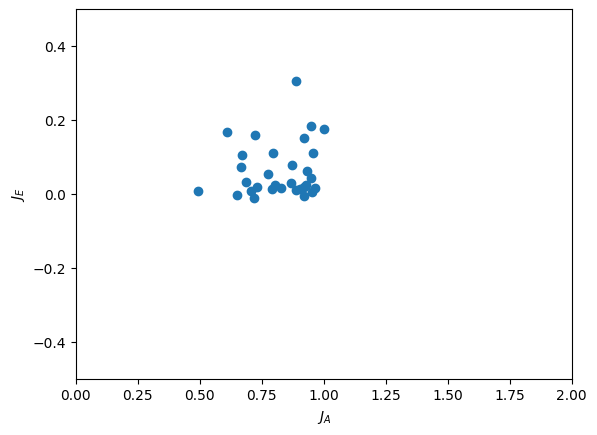

In [8]:
plt.scatter(J_As, J_Es)
plt.xlim([0, 2])
plt.xlabel(r'$J_A$')
plt.ylim([-0.5, 0.5])
plt.ylabel(r'$J_E$')